# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


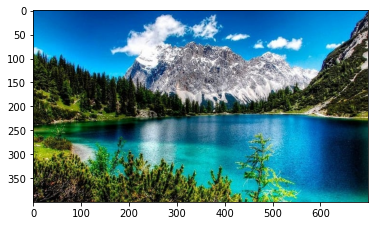

In [ ]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [ ]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

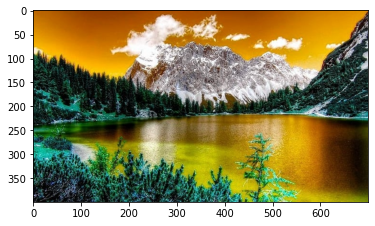

In [ ]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). 

Let's fix that

AxesImage(54,36;334.8x217.44)


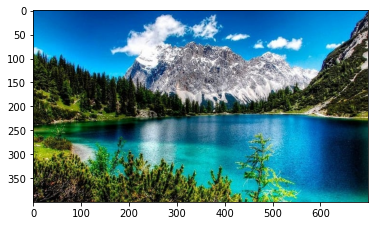

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


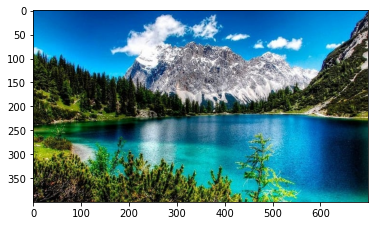

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(400, 700, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

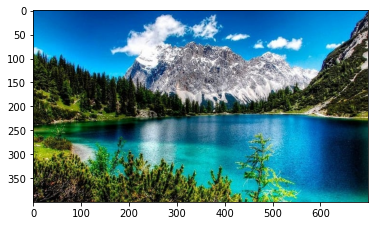

In [ ]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it. 

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 700 x 400
New size: 200 x 200


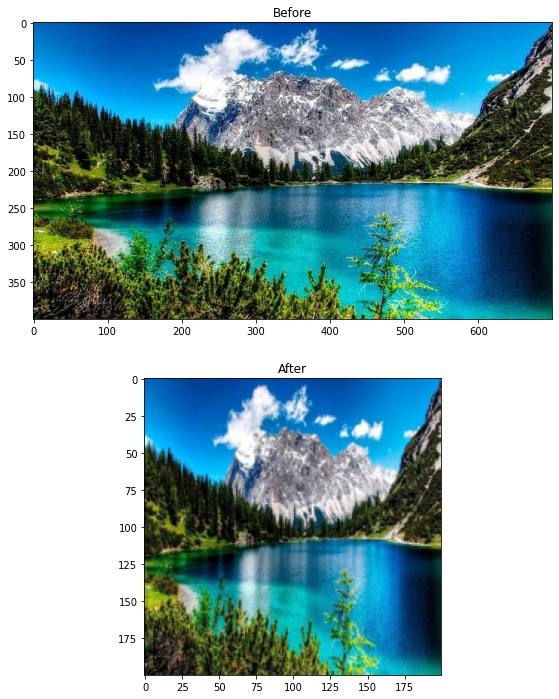

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


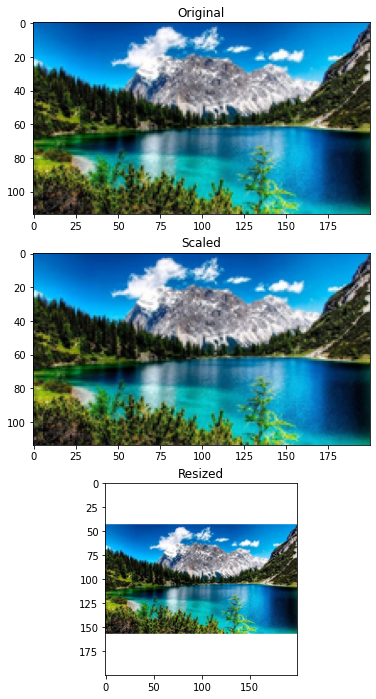

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

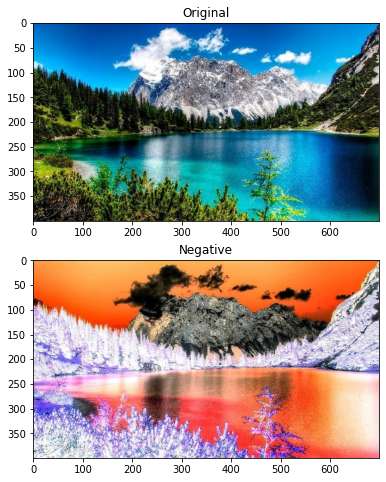

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_14972\418958946.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

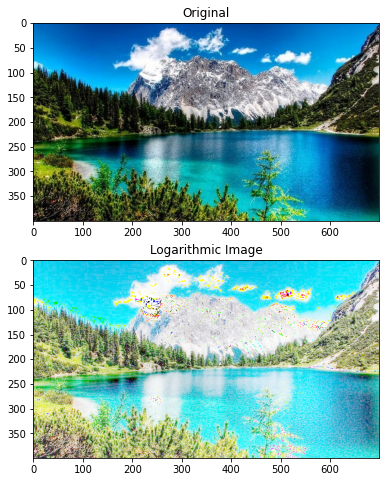

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

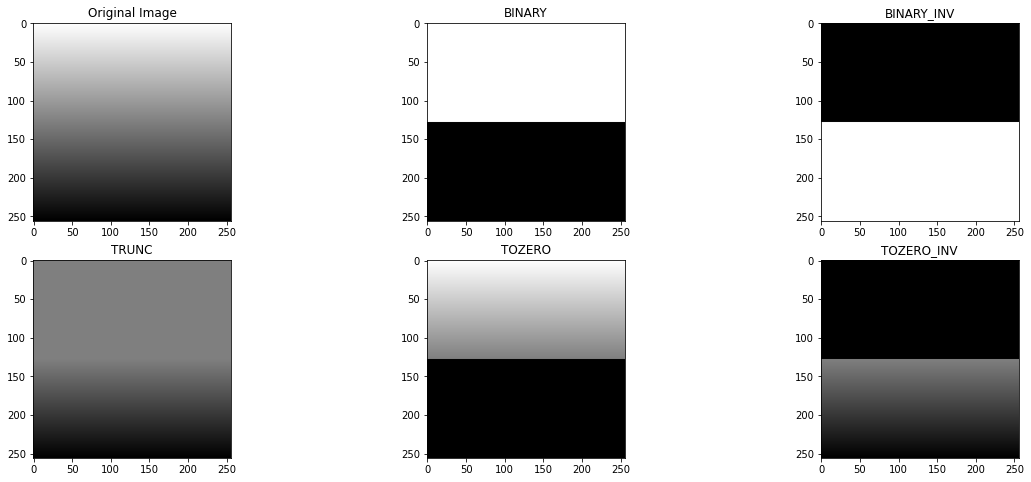

In [ ]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

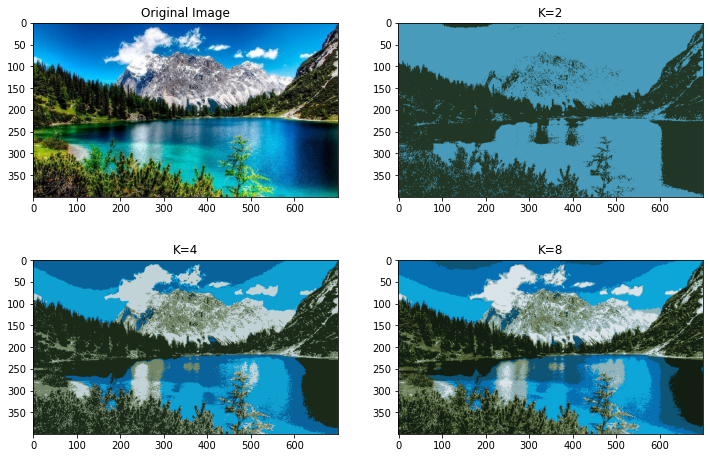

In [ ]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
   
   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

# **Simple_ImgProcessing**

Equipo 17: 
* José Miguel Guerrero Arias
* Josías Ruiz Peña
* Jesús Ángel Salazar Marcatoma
* Jorge Luis Tapia Peñaloza
* Juan Carlos Torres Luna



# Ejercicios 

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

In [ ]:
!pip install --upgrade -q Pillow==9.0.0

In [ ]:
from PIL import Image, ImageOps
from io import BytesIO
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import requests

In [ ]:
def load_image_url(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  return img

In [ ]:

path = "https://concepto.de/wp-content/uploads/2015/03/paisaje-e1549600034372.jpg"
img = load_image_url(path)
img_array = np.array(img)

In [ ]:
transform_1 = A.Compose([A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),])
transform_2 = A.Compose([A.RandomSnow(brightness_coeff = 2.5, snow_point_lower=0.3, snow_point_upper=0.5, p=1)])
transform_3 = A.Compose([A.Blur(always_apply=False, p=1.0, blur_limit=(3, 7))])
transform_4 = A.Compose([A.Sharpen()])

In [ ]:
imgs_augmented = []
for name,trans in [("BrightnessContrast",transform_1), ("RandomSnow", transform_2), ("Blur", transform_3), ("Sharpen", transform_4)]:
  img_aug = (trans( image = img_array )["image"])
  imgs_augmented.append((name, img_aug))

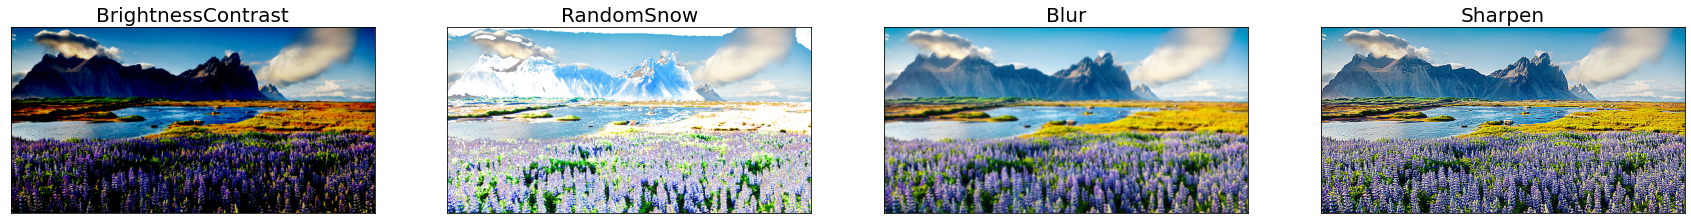

In [ ]:
fig,axs = plt.subplots(1,4,figsize = (30, 10))
for i, (name, img_) in enumerate(imgs_augmented):
  axs[i].imshow(img_)
  axs[i].xaxis.set_visible(False)
  axs[i].yaxis.set_visible(False)
  axs[i].set_title(name, fontdict = {'fontsize': 20})
plt.show()

2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.


La imagen negativa es una imagen en la que las áreas más claras aparecen como las más oscuras y las áreas más oscuras aparecen como las más claras.

Cambiar la apariencia de más claro a más oscuro y de más oscuro a más claro se realiza básicamente en una imagen en escala de grises y se refiere a cambiar los valores de intensidad de píxeles de mayor a menor y de menor a mayor.

En el caso de una imagen en color, los diferentes colores se representan como diferentes negativos de color según sus valores de intensidad.

Podemos encontrar una aplicacion en el siguiente paper: https://www.researchgate.net/publication/267026565_Comparative_study_of_digital_image_enhancement_approaches

Donde menciona que esta transformación es especialmente adecuada para imágenes médicas donde los expertos pueden obtener información valiosa para hacer la
diagnóstico.


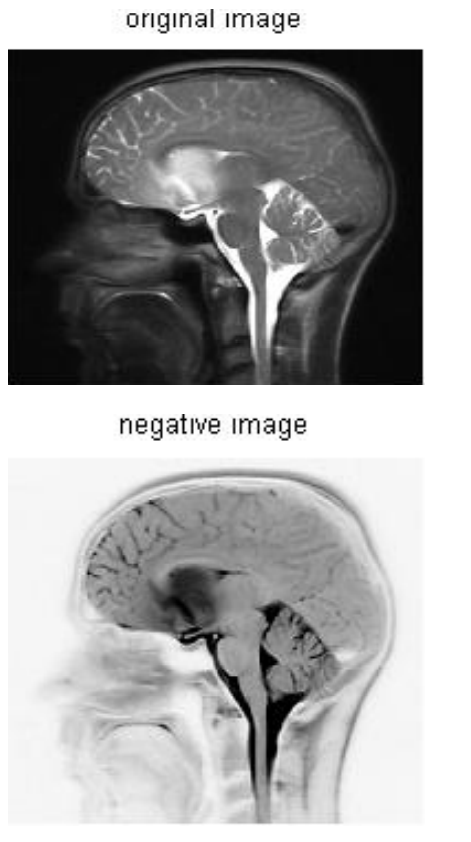


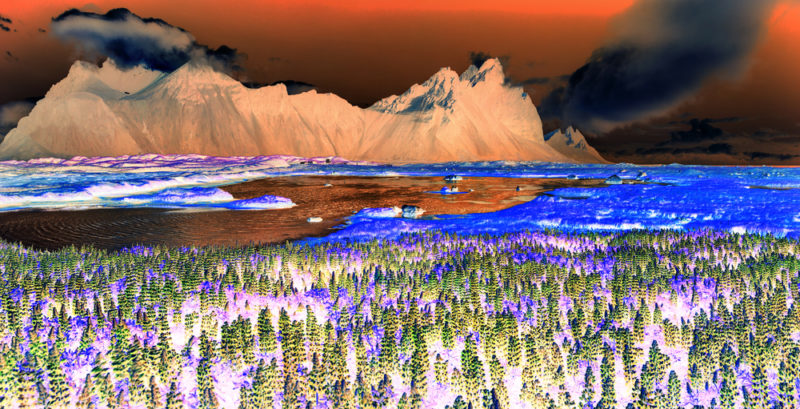

In [ ]:
img_inverted = ImageOps.invert(img,)
img_inverted


3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

La corrección gamma es la aplicación de una función que transforma los valores de brillo o luminancia. Las funciones de gamma suelen ser no lineales pero monótonas y están diseñadas para afectar las luces (valores más blancos), los medios tonos (escala de grises) y las sombras (áreas oscuras) por separado.

De acuerdo al siguiente paper: https://www.researchgate.net/publication/312158758_Segmentation_of_pectoral_muscle_using_the_adaptive_gamma_corrections

La corrección gamma se aplica a las mamografías para mejorar el contraste y encontrar una línea fronteriza discriminatoria entre la región mamaria y el parénquima pectoral.



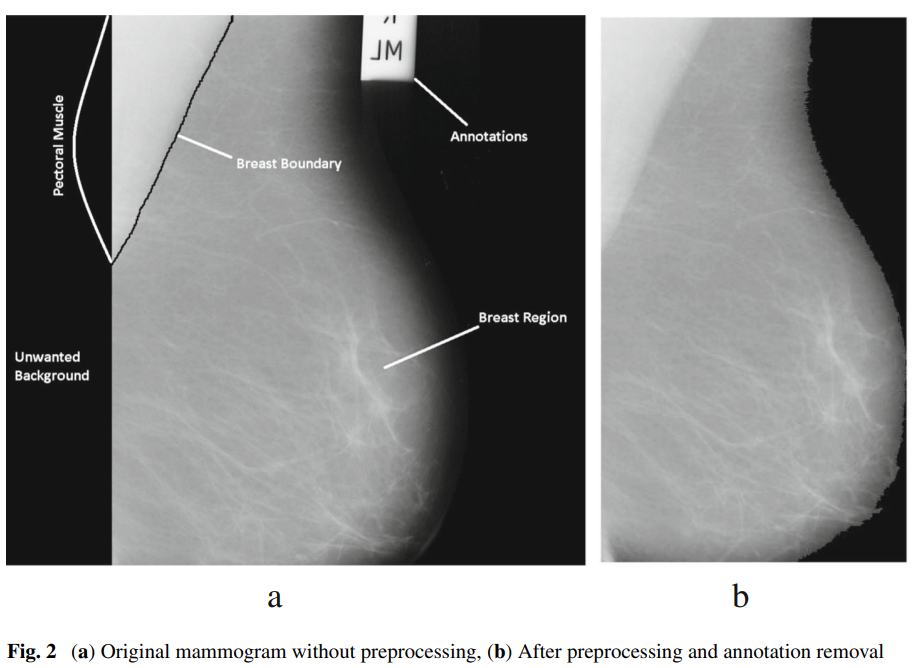

In [ ]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

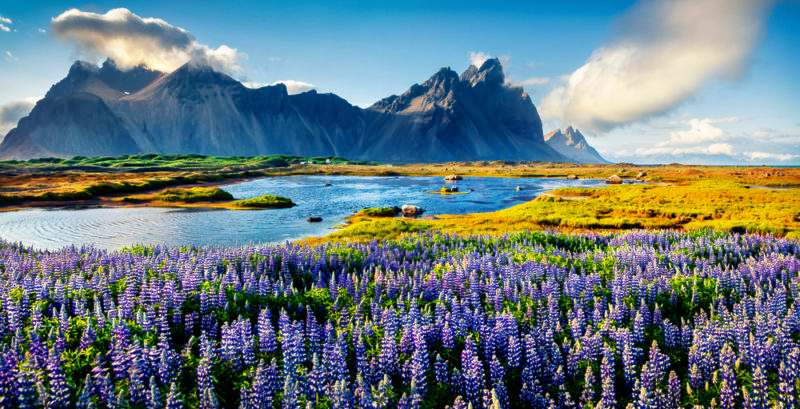

In [ ]:
Image.fromarray(gammaCorrection(img_array, .75))

4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.


De acuerdo al siguiente paper:

https://www.researchgate.net/publication/361476649_Usefulness_of_subtraction_images_for_accurate_diagnosis_of_pituitary_microadenomas_in_dynamic_contrast-enhanced_magnetic_resonance_imaging



Las sustracción de imagenes pueden identificar con éxito todas las lesiones detectables con resonancia magnética dinámica convencional, así como mejorar la visualización de lesiones no detectadas en resonancia magnética dinámica, especialmente en lesiones pequeñas

In [ ]:
img_1 = load_image_url("https://omes-va.com/wp-content/uploads/2019/09/cadena.jpg")
img_1_array = np.array(img_1)
img_2 = load_image_url("https://omes-va.com/wp-content/uploads/2019/09/sacapuntas.jpg")
img_2_array = np.array(img_2)

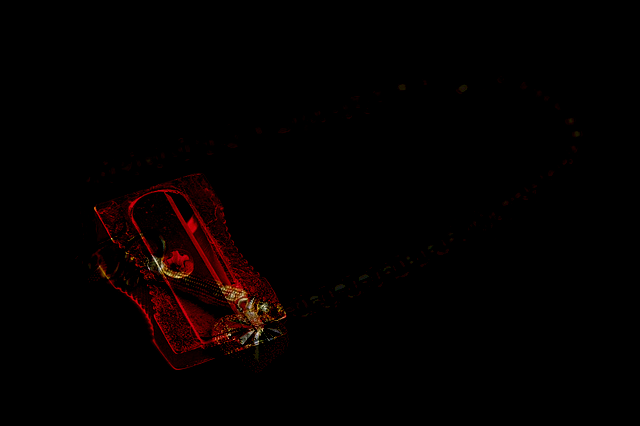

In [ ]:
Image.fromarray(cv2.subtract(img_1_array,img_2_array))

# Referencias

* Sanei Taheri, Morteza & Ghomi, Zahra & Mirshahi, Reza & Moradpour, Moein & Niroomand, Mahtab & Yarmohamadi, Parsa & Zeidabadi, Hamideh. (2022). Usefulness of subtraction images for accurate diagnosis of pituitary microadenomas in dynamic contrast-enhanced magnetic resonance imaging. Acta Radiologica. 028418512211073. 10.1177/02841851221107344. 



* Gardezi, Jamal & Adjed, Faouzi & Faye, Ibrahima & Kamel, Nidal & Eltoukhy, Mohamed Meselhy. (2018). Segmentation of pectoral muscle using the adaptive gamma corrections. Multimedia Tools and Applications. 77. 1-22. 10.1007/s11042-016-4283-4. 



* Malik, Showkat & Lone, Tariq. (2014). Comparative study of digital image enhancement approaches. 10.1109/ICCCI.2014.6921749. 